<h1>Basic test of the wflow BMI interface

In [14]:
import wflow.wflow_bmi as bmi
import logging

reload(bmi)
%pylab inline 
import datetime
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


Startup two models:

+ The wflow_sbm model calculates the runoff from each cell (the LA land-atmosphere model)
+ the wflow_routing model that uses a kinimatic wave for routing the flow (the RT routing model)

In [15]:
# This is the LAnd Atmophere (LA) model
LA_model = bmi.wflowbmi_csdms()
LA_model.initialize('../../examples/wflow_rhine_sbm/wflow_sbm.ini',loglevel=logging.ERROR)

# This is the routing (RT) model
RT_model = bmi.wflowbmi_csdms()
RT_model.initialize('../../examples/wflow_rhine_sbm/wflow_routing.ini',loglevel=logging.ERROR)

ERROR
CanopyStorage
FirstZoneDepth
LowerZoneStorage
Snow
SnowWater
SurfaceRunoff
SurfaceRunoffDyn
TSoil
UStoreDepth
WaterLevel
WaterLevelDyn
PotTransSoil
Transpiration
ActEvapOpenWater
soilevap
Interception
ActEvap
SurfaceRunoffCatchmentMM
ExcessWater
InfiltExcess
ActInfilt
zi
Transfer
CapFlux
RunoffCoeff
InwaterMM
M
thetaR
thetaS
FirstZoneKsatVer
PathFrac
InfiltCapSoil
InfiltCapPath
FirstZoneMinCapacity
FirstZoneCapacity
RootingDepth
MaxLeakage
CapScale
RunoffGeneratingGWPerc
rootdistpar
CanopyGapFraction
MaxCanopyStorage
EoverR
N
N_river
cf_soil
TTI
TT
Cfmax
WHC
w_soil
Altitude
Bw
River
DLC
IF
ERROR


<h3>Now we can investigate some model parameters

In [16]:
print(LA_model.get_value("timestepsecs"))
print LA_model.get_start_time()

86400
631152000


In [17]:
LA_model.get_attribute_names()

['inputmapstacks:Precipitation',
 'inputmapstacks:EvapoTranspiration',
 'inputmapstacks:Temperature',
 'inputmapstacks:Inflow',
 'run:runinfo',
 'run:timestepsecs',
 'run:reinit',
 'run:starttime',
 'model:modeltype',
 'model:AnnualDischarge',
 'model:Alpha',
 'model:ModelSnow',
 'model:ScalarInput',
 'model:InterpolationMethod',
 'model:WIMaxScale',
 'model:Tslice',
 'model:UpdMaxDist',
 'model:origTopogLateral',
 'model:configfile',
 'model:reinit',
 'model:fewsrun',
 'model:OverWriteInit',
 'model:updating',
 'model:updateFile',
 'model:lateralmethod',
 'model:sCatch',
 'model:intbl',
 'model:timestepsecs',
 'model:MaxUpdMult',
 'model:MinUpdMult',
 'model:UpFrac',
 'model:waterdem',
 'model:reInfilt',
 'model:MassWasting',
 'model:wflow_subcatch',
 'model:wflow_dem',
 'model:wflow_ldd',
 'model:wflow_river',
 'model:wflow_riverlength',
 'model:wflow_riverlength_fact',
 'model:wflow_landuse',
 'model:wflow_soil',
 'model:wflow_gauges',
 'model:wflow_inflow',
 'model:wflow_riverwidth

In [18]:
LA_model.get_attribute_value("run:reinit")

'0'

In [19]:
LA_model.set_attribute_value("run:reinit",'1')
LA_model.get_attribute_value("run:reinit")

'1'

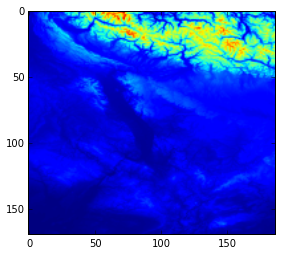

In [20]:
imshow(LA_model.get_value("Altitude"))

2015-12-18 09:39:21,428 - wflow_bmi_logging - ERROR - get_value: Slope not in list of output values ['CanopyStorage', 'FirstZoneDepth', 'LowerZoneStorage', 'Snow', 'SnowWater', 'SurfaceRunoff', 'SurfaceRunoffDyn', 'TSoil', 'UStoreDepth', 'WaterLevel', 'WaterLevelDyn', 'InwaterMM', 'M', 'thetaR', 'thetaS', 'FirstZoneKsatVer', 'PathFrac', 'InfiltCapSoil', 'InfiltCapPath', 'FirstZoneMinCapacity', 'FirstZoneCapacity', 'RootingDepth', 'MaxLeakage', 'CapScale', 'RunoffGeneratingGWPerc', 'rootdistpar', 'CanopyGapFraction', 'MaxCanopyStorage', 'EoverR', 'N', 'N_river', 'cf_soil', 'TTI', 'TT', 'Cfmax', 'WHC', 'w_soil', 'Altitude', 'Bw', 'River', 'DLC', 'IF', 'timestepsecs']
2015-12-18 09:39:21,428 - wflow_bmi_logging - ERROR - get_value: Slope not in list of output values ['CanopyStorage', 'FirstZoneDepth', 'LowerZoneStorage', 'Snow', 'SnowWater', 'SurfaceRunoff', 'SurfaceRunoffDyn', 'TSoil', 'UStoreDepth', 'WaterLevel', 'WaterLevelDyn', 'InwaterMM', 'M', 'thetaR', 'thetaS', 'FirstZoneKsatVer',

TypeError: Image data can not convert to float

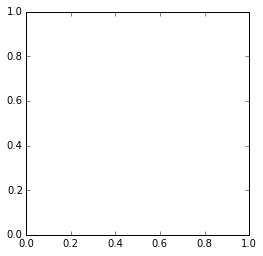

In [21]:
imshow(LA_model.get_value("Slope"))

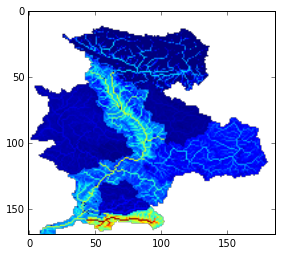

In [22]:
imshow(LA_model.get_value("FirstZoneDepth"))

In [23]:
a =LA_model.get_value("TopoId")
a[a==-2147483648] = 0
imshow(a)

2015-12-18 09:39:23,632 - wflow_bmi_logging - ERROR - get_value: TopoId not in list of output values ['CanopyStorage', 'FirstZoneDepth', 'LowerZoneStorage', 'Snow', 'SnowWater', 'SurfaceRunoff', 'SurfaceRunoffDyn', 'TSoil', 'UStoreDepth', 'WaterLevel', 'WaterLevelDyn', 'InwaterMM', 'M', 'thetaR', 'thetaS', 'FirstZoneKsatVer', 'PathFrac', 'InfiltCapSoil', 'InfiltCapPath', 'FirstZoneMinCapacity', 'FirstZoneCapacity', 'RootingDepth', 'MaxLeakage', 'CapScale', 'RunoffGeneratingGWPerc', 'rootdistpar', 'CanopyGapFraction', 'MaxCanopyStorage', 'EoverR', 'N', 'N_river', 'cf_soil', 'TTI', 'TT', 'Cfmax', 'WHC', 'w_soil', 'Altitude', 'Bw', 'River', 'DLC', 'IF', 'timestepsecs']
2015-12-18 09:39:23,632 - wflow_bmi_logging - ERROR - get_value: TopoId not in list of output values ['CanopyStorage', 'FirstZoneDepth', 'LowerZoneStorage', 'Snow', 'SnowWater', 'SurfaceRunoff', 'SurfaceRunoffDyn', 'TSoil', 'UStoreDepth', 'WaterLevel', 'WaterLevelDyn', 'InwaterMM', 'M', 'thetaR', 'thetaS', 'FirstZoneKsatVer

TypeError: 'NoneType' object does not support item assignment

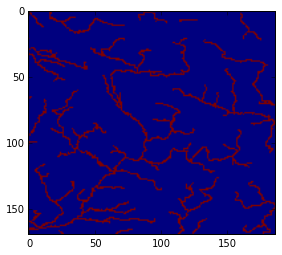

In [24]:
imshow(LA_model.get_value("River"))

<h3>Start and end times

In [25]:
t_end = RT_model.get_end_time()
t_start = RT_model.get_start_time()
t = RT_model.get_current_time()

(t_end  - t_start)/(86400)


9999

<h3>Now start the models

In [ ]:
t_end = RT_model.get_end_time()
t = RT_model.get_start_time()

res = []
resq = []

# Loop in time and put output of SBM in seperate routing module - 1way link
while t < t_end:
    LA_model.update()
    # Now set the output from the LA model (specific Q) as input to the RT model
    thevar = LA_model.get_value("InwaterMM")
    RT_model.set_value("IW",thevar) # The IW is set in the wflow_routing.ini var as a forcing
    RT_model.update()
    resq.append(RT_model.get_value("SurfaceRunoff"))
    res.append(thevar)
    t = RT_model.get_current_time()
    
    print datetime.datetime.fromtimestamp(t)


2015-12-18 09:39:31,844 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:31,844 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:31,844 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:31,844 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,075 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,075 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,075 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,075 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_val

1990-01-02 01:00:00
1990-01-03 01:00:00

2015-12-18 09:39:32,314 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,314 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,314 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,314 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-04 01:00:00

2015-12-18 09:39:32,548 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,548 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,548 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,548 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-05 01:00:00

2015-12-18 09:39:32,778 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,778 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,778 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:32,778 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-06 01:00:00

2015-12-18 09:39:33,023 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,023 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,023 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,023 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-07 01:00:00

2015-12-18 09:39:33,265 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,265 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,265 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,265 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-08 01:00:00

2015-12-18 09:39:33,505 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,505 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,505 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,505 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-09 01:00:00

2015-12-18 09:39:33,745 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,745 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,745 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,745 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-10 01:00:00

2015-12-18 09:39:33,979 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,979 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,979 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:33,979 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-11 01:00:00

2015-12-18 09:39:34,220 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,220 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,220 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,220 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-12 01:00:00

2015-12-18 09:39:34,462 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,462 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,462 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,462 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-13 01:00:00

2015-12-18 09:39:34,690 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,690 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,690 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,690 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-14 01:00:00

2015-12-18 09:39:34,929 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,929 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,929 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:34,929 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-15 01:00:00

2015-12-18 09:39:35,169 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,169 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,169 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,169 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-16 01:00:00

2015-12-18 09:39:35,456 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,456 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,456 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,456 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-17 01:00:00

2015-12-18 09:39:35,703 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,703 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,703 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,703 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-18 01:00:00

2015-12-18 09:39:35,940 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,940 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,940 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:35,940 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-19 01:00:00

2015-12-18 09:39:36,175 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,175 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,175 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,175 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-20 01:00:00

2015-12-18 09:39:36,413 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,413 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,413 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,413 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-21 01:00:00

2015-12-18 09:39:36,650 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,650 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,650 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,650 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-22 01:00:00

2015-12-18 09:39:36,919 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,919 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,919 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:36,919 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-23 01:00:00

2015-12-18 09:39:37,157 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,157 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,157 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,157 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-24 01:00:00

2015-12-18 09:39:37,402 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,402 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,402 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,402 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-25 01:00:00

2015-12-18 09:39:37,646 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,646 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,646 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,646 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-26 01:00:00

2015-12-18 09:39:37,893 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,893 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,893 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:37,893 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-27 01:00:00

2015-12-18 09:39:38,134 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,134 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,134 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,134 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-28 01:00:00

2015-12-18 09:39:38,368 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,368 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,368 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,368 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-29 01:00:00

2015-12-18 09:39:38,602 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,602 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,602 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,602 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-30 01:00:00

2015-12-18 09:39:38,838 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,838 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,838 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:38,838 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-01-31 01:00:00

2015-12-18 09:39:39,068 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,068 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,068 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,068 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-01 01:00:00

2015-12-18 09:39:39,300 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,300 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,300 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,300 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-02 01:00:00

2015-12-18 09:39:39,531 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,531 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,531 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,531 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-03 01:00:00

2015-12-18 09:39:39,771 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,771 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,771 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:39,771 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-04 01:00:00

2015-12-18 09:39:40,007 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,007 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,007 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,007 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-05 01:00:00

2015-12-18 09:39:40,236 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,236 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,236 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,236 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-06 01:00:00

2015-12-18 09:39:40,466 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,466 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,466 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,466 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-07 01:00:00

2015-12-18 09:39:40,698 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,698 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,698 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,698 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-08 01:00:00

2015-12-18 09:39:40,931 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,931 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,931 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:40,931 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-09 01:00:00

2015-12-18 09:39:41,160 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,160 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,160 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,160 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-10 01:00:00

2015-12-18 09:39:41,386 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,386 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,386 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,386 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-11 01:00:00

2015-12-18 09:39:41,632 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,632 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,632 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,632 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-12 01:00:00

2015-12-18 09:39:41,870 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,870 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,870 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:41,870 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-13 01:00:00

2015-12-18 09:39:42,112 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:42,112 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:42,112 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
2015-12-18 09:39:42,112 - wflow_bmi_logging - ERROR - get_value: SurfaceRunoff not in list of output values []
ERROR:wflow_bmi_logging:get_value: SurfaceRunoff not in list of output values []



1990-02-14 01:00:00

In [ ]:
LA_model.finalize()
RT_model.finalize()

<h4>Define function to view the results

In [ ]:
def browse_res(digits):
    n = len(digits)
    def view_image(i):
        plt.imshow(log(digits[i]+1))
        plt.title('Step: %d' % i)
        plt.colorbar()
        plt.show()
    interact(view_image, i=(0,n-1))

In [ ]:

browse_res(res)


In [ ]:
 browse_res(resq)